import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
from matplotlib import pyplot as plt 
%matplotlib inline

In [3]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
len(df)

7043

In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [8]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
total_charges = pd.to_numeric(df.TotalCharges,errors='coerce')


In [10]:
df[total_charges.isnull()][['customerID','TotalCharges']]

,customerID,TotalCharges
488,4472-LVYGI,
753,3115-CZMZD,
936,5709-LVOEQ,
1082,4367-NUYAO,
1340,1371-DWPAZ,
3331,7644-OMVMY,
3826,3213-VVOLG,
4380,2520-SGTTA,
5218,2923-ARZLG,
6670,4075-WKNIU,


In [11]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.TotalCharges = df.TotalCharges.fillna(0)

In [12]:
df.TotalCharges.info

<bound method Series.info of 0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64>

In [13]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
string_columns = list(df.dtypes[df.dtypes == 'object'].index)
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [14]:
df.head(3)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.50,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes


In [15]:
df.churn = (df.churn == 'yes').astype(int)

In [16]:
df.churn.head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int32

In [17]:
from sklearn.model_selection import train_test_split
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [18]:
df_train_full.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
1814,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
5946,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
3881,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
2389,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
3676,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


In [19]:
df_train, df_val = train_test_split(df_train_full, test_size=0.33,
random_state=11)
y_train = df_train.churn.values
y_val = df_val.churn.values
del df_train['churn']
del df_val['churn']

In [20]:
df_train_full.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

### check the distribution of values in the target variable

In [22]:
df_train_full.churn.value_counts()


churn
0    4113
1    1521
Name: count, dtype: int64

In [23]:
global_mean = df_train_full.churn.mean()
round(global_mean,2)

0.27

In [24]:
numerical=[feature for feature in df_train_full.columns if df_train_full[feature].dtypes!='object']
categorical=[feature for feature in df_train_full.columns if df_train_full[feature].dtypes=='object']

In [25]:
numerical

['seniorcitizen', 'tenure', 'monthlycharges', 'totalcharges', 'churn']

In [26]:
categorical

['customerid',
 'gender',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod']

In [27]:
df_train_full[categorical].nunique()

customerid          5634
gender                 2
partner                2
dependents             2
phoneservice           2
multiplelines          3
internetservice        3
onlinesecurity         3
onlinebackup           3
deviceprotection       3
techsupport            3
streamingtv            3
streamingmovies        3
contract               3
paperlessbilling       2
paymentmethod          4
dtype: int64

In [28]:
female_mean = df_train_full[df_train_full.gender == 'female'].churn.mean()
male_mean = df_train_full[df_train_full.gender == 'male'].churn.mean()
print('female mean :',female_mean)
print('male mean :',male_mean)

female mean : 0.27682403433476394
male mean : 0.2632135306553911


In [29]:
partner_yes = df_train_full[df_train_full.partner == 'yes'].churn.mean()
partner_no = df_train_full[df_train_full.partner == 'no'].churn.mean()
print('partner_yes :',partner_yes)
print('partner_no :',partner_no)

partner_yes : 0.20503330866025166
partner_no : 0.3298090040927694


In [30]:
from IPython.display import display
for col in categorical:
    df_group = df_train_full.groupby(by=col).churn.agg(['mean'])
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['rate'] = df_group['mean'] / global_mean
    display(df_group)

,mean,diff,rate
customerid,,,
0002-orfbo,0.0,-0.269968,0.000000
0004-tlhlj,1.0,0.730032,3.704142
0011-igkff,1.0,0.730032,3.704142
0013-exchz,1.0,0.730032,3.704142
0013-mhzwf,0.0,-0.269968,0.000000
...,...,...,...
9987-lutyd,0.0,-0.269968,0.000000
9992-rramn,1.0,0.730032,3.704142
9992-ujoel,0.0,-0.269968,0.000000


,mean,diff,rate
gender,,,
female,0.276824,0.006856,1.025396
male,0.263214,-0.006755,0.974980


,mean,diff,rate
partner,,,
no,0.329809,0.059841,1.221659
yes,0.205033,-0.064935,0.759472


,mean,diff,rate
dependents,,,
no,0.313760,0.043792,1.162212
yes,0.165666,-0.104302,0.613651


,mean,diff,rate
phoneservice,,,
no,0.241316,-0.028652,0.893870
yes,0.273049,0.003081,1.011412


,mean,diff,rate
multiplelines,,,
no,0.257407,-0.012561,0.953474
no_phone_service,0.241316,-0.028652,0.893870
yes,0.290742,0.020773,1.076948


,mean,diff,rate
internetservice,,,
dsl,0.192347,-0.077621,0.712482
fiber_optic,0.425171,0.155203,1.574895
no,0.077805,-0.192163,0.288201


,mean,diff,rate
onlinesecurity,,,
no,0.420921,0.150953,1.559152
no_internet_service,0.077805,-0.192163,0.288201
yes,0.153226,-0.116742,0.567570


,mean,diff,rate
onlinebackup,,,
no,0.404323,0.134355,1.497672
no_internet_service,0.077805,-0.192163,0.288201
yes,0.217232,-0.052736,0.804660


,mean,diff,rate
deviceprotection,,,
no,0.395875,0.125907,1.466379
no_internet_service,0.077805,-0.192163,0.288201
yes,0.230412,-0.039556,0.853480


,mean,diff,rate
techsupport,,,
no,0.418914,0.148946,1.551717
no_internet_service,0.077805,-0.192163,0.288201
yes,0.159926,-0.110042,0.592390


,mean,diff,rate
streamingtv,,,
no,0.342832,0.072864,1.269897
no_internet_service,0.077805,-0.192163,0.288201
yes,0.302723,0.032755,1.121328


,mean,diff,rate
streamingmovies,,,
no,0.338906,0.068938,1.255358
no_internet_service,0.077805,-0.192163,0.288201
yes,0.307273,0.037305,1.138182


,mean,diff,rate
contract,,,
month-to-month,0.431701,0.161733,1.599082
one_year,0.120573,-0.149395,0.446621
two_year,0.028274,-0.241694,0.104730


,mean,diff,rate
paperlessbilling,,,
no,0.172071,-0.097897,0.637375
yes,0.338151,0.068183,1.252560


,mean,diff,rate
paymentmethod,,,
bank_transfer_(automatic),0.168171,-0.101797,0.622928
credit_card_(automatic),0.164339,-0.105630,0.608733
electronic_check,0.455890,0.185922,1.688682
mailed_check,0.193870,-0.076098,0.718121


In [31]:
from sklearn.metrics import mutual_info_score
def calculate_mi(series):
    return mutual_info_score(series, df_train_full.churn)
df_mi = df_train_full[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
df_mi

,MI
customerid,0.583227
contract,0.098320
onlinesecurity,0.063085
techsupport,0.061032
internetservice,0.055868
onlinebackup,0.046923
deviceprotection,0.043453
paymentmethod,0.043210
streamingtv,0.031853
streamingmovies,0.031581


In [32]:
df_train_full[numerical].corrwith(df_train_full.churn)

seniorcitizen     0.141966
tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
churn             1.000000
dtype: float64

In [33]:
train_dict = df_train.to_dict(orient='records')


In [34]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [35]:
X_train = dv.transform(train_dict)

In [36]:
X_train[0]

array([0.0000e+00, 0.0000e+00, 1.0000e+00, ..., 1.0000e+00, 7.1000e+01,
       6.0459e+03])

In [37]:
X_train.shape

(3774, 3819)

In [38]:
print(X_train)

[[0.00000e+00 0.00000e+00 1.00000e+00 ... 1.00000e+00 7.10000e+01
  6.04590e+03]
 [0.00000e+00 1.00000e+00 0.00000e+00 ... 0.00000e+00 6.00000e+01
  6.02900e+03]
 [1.00000e+00 0.00000e+00 0.00000e+00 ... 0.00000e+00 4.60000e+01
  2.06515e+03]
 ...
 [0.00000e+00 1.00000e+00 0.00000e+00 ... 0.00000e+00 2.00000e+00
  2.83000e+01]
 [1.00000e+00 0.00000e+00 0.00000e+00 ... 0.00000e+00 2.30000e+01
  4.70600e+02]
 [1.00000e+00 0.00000e+00 0.00000e+00 ... 1.00000e+00 6.40000e+01
  5.32725e+03]]


In [39]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [40]:
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [41]:
y_pred = model.predict_proba(X_val)
y_pred

array([[0.75249691, 0.24750309],
       [0.70409848, 0.29590152],
       [0.68845828, 0.31154172],
       ...,
       [0.94599363, 0.05400637],
       [0.38180261, 0.61819739],
       [0.93042604, 0.06957396]])

### Make a condition about the probability of churn (threshold)


In [43]:
churn = y_pred >= 0.5
churn

array([[ True, False],
       [ True, False],
       [ True, False],
       ...,
       [ True, False],
       [False,  True],
       [ True, False]])

In [44]:
y_pred = model.predict_proba(X_val)[:, 1]

In [45]:
churn = y_pred >= 0.5
churn

array([False, False, False, ..., False,  True, False])

In [46]:
accuracy=(y_val == churn).mean()
accuracy

0.7978494623655914

### bias

In [48]:
model.intercept_[0]

-0.13053969562546866

In [49]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))


{'contract=month-to-month': 0.537,
 'contract=one_year': -0.103,
 'contract=two_year': -0.565,
 'customerid=0002-orfbo': -0.006,
 'customerid=0013-exchz': 0.009,
 'customerid=0013-mhzwf': -0.01,
 'customerid=0013-smeoe': -0.002,
 'customerid=0014-bmaqu': -0.001,
 'customerid=0015-uocoj': -0.012,
 'customerid=0017-dinoc': -0.0,
 'customerid=0018-nyrou': -0.017,
 'customerid=0019-efaep': -0.002,
 'customerid=0021-ikxgc': -0.02,
 'customerid=0023-uyupn': -0.0,
 'customerid=0027-kwykw': -0.015,
 'customerid=0030-fnxpp': -0.005,
 'customerid=0036-ihmot': -0.003,
 'customerid=0042-jvwoj': -0.001,
 'customerid=0042-rlhyp': -0.0,
 'customerid=0052-dckon': -0.003,
 'customerid=0056-epfbg': -0.002,
 'customerid=0057-qbuqh': -0.001,
 'customerid=0064-sudog': -0.002,
 'customerid=0071-ndafp': -0.001,
 'customerid=0078-xzmht': -0.001,
 'customerid=0080-emyvy': -0.005,
 'customerid=0080-orozo': -0.009,
 'customerid=0083-pivik': -0.001,
 'customerid=0093-xwzfy': 0.015,
 'customerid=0094-oifmo': 0.007

In [50]:
customer = {
'customerid': '8879-zkjof',
'gender': 'female',
'seniorcitizen': 0,
'partner': 'no',
'dependents': 'no',
'tenure': 41,
'phoneservice': 'yes',
'multiplelines': 'no',
'internetservice': 'dsl',
'onlinesecurity': 'yes',
'onlinebackup': 'no',
'deviceprotection': 'yes',
'techsupport': 'yes',
'streamingtv': 'yes',
'streamingmovies': 'yes',
'contract': 'one_year',
'paperlessbilling': 'yes',
'paymentmethod': 'bank_transfer_(automatic)',
'monthlycharges': 79.85,
'totalcharges': 3320.75,
}

In [51]:
X_test = dv.transform([customer])
X_test

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        4.10000e+01, 3.32075e+03]])

In [52]:
model.predict_proba(X_test)

array([[0.92588142, 0.07411858]])

### Evaluation metrics for our Model

In [109]:
y_pred = model.predict_proba(X_val)[:, 1]
churn = y_pred >= 0.5
(churn == y_val).mean().round (2)

0.8

### evaluate accuracy for different thresholds

In [114]:
from sklearn.metrics import accuracy_score
thresholds = np.linspace(0, 1, 11)
for t in thresholds:
   churn = y_pred >= t
   acc = accuracy_score(y_val, churn)
   print('%0.2f %0.3f' % (t, acc))

0.00 0.261
0.10 0.592
0.20 0.696
0.30 0.751
0.40 0.783
0.50 0.798
0.60 0.791
0.70 0.773
0.80 0.742
0.90 0.739
1.00 0.739


##### now we can interprate that 0.5 is the threshold that gives us the best accuracy for our model 

##### To make it more visual, we can use Matplotlib to create 
##### a plot that shows how accuracy 
changes depending on the thresholdd

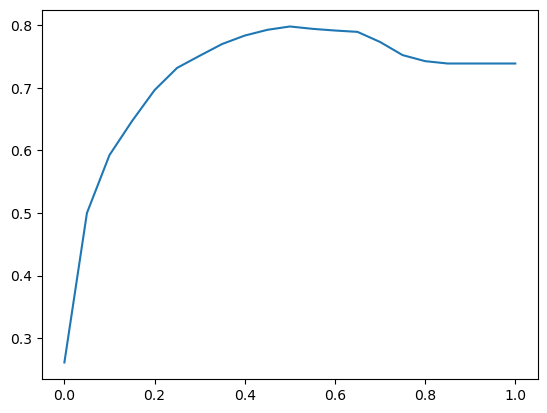

In [131]:
thresholds = np.linspace(0, 1, 21)
accuracies = []
for t in thresholds:
   acc = accuracy_score(y_val, y_pred >= t)
   accuracies.append(acc)
plt.plot(thresholds,accuracies)

#### the confusion table methode


In [140]:
t = 0.5
predict_churn = (y_pred >= t)
predict_no_churn = (y_pred < t)
actual_churn = (y_val == 1)
actual_no_churn = (y_val == 0)
true_positive = (predict_churn & actual_churn).sum()
false_positive = (predict_churn & actual_no_churn).sum()
false_negative = (predict_no_churn & actual_churn).sum()
true_negative = (predict_no_churn & actual_no_churn).sum()
confusion_table = np.array(
[[true_negative, false_positive],
[false_negative, true_positive]])
confusion_table

array([[1203,  171],
       [ 205,  281]])

In [142]:
confusion_table / confusion_table.sum()

array([[0.64677419, 0.09193548],
       [0.11021505, 0.15107527]])

#### so we can summarize that 65% of the prediction are true negative However, it
makes quite a few mistakes of both types: the number of false positives and false negative
is roughly equal (9% and 11%, respectively).